<img src="nq.png">

### IA - Estudio de caso:

A usted se la ha pedido que desarrolle una aplicación que pueda reconocer la actividad que está realizando una persona con los datos tomados por el acelerógrafo de su celular. Parte del equipo ya realizó la recolección y extracción de las características para cinco diferentes actividades físicas humanas: Sentarse, estar de pie, caminar, correr y bailar.  Al final del trabajo, se quedaron con 60 características por observación, extraídas de la aceleración de las mediciones de los sensores de acelerómetro de varios teléfonos inteligentes. A usted se le entrega aproximadamente 25000 registros con 60 características incluido el tipo de actividad y se le pide que proponga una solución para que reconozca la actividad. 

1.	Usted hará una revisión de los datos para familiarizarse con el problema y la data. ¿qué análisis realizaría?
2.	Por ahora usted va a trabajar con los datos que le han facilitado.  Qué algoritmos usaría y cómo se asegura que los resultados son confiables y que debe hacer para confiar en ellos, explique 
3.	Explique cómo implementa la aplicación para que el sistema pueda reconocer la actividad física, explique por pasos que necesita y cómo implementarlo.
4.	Usted quiere asegurarse que todas las características entregadas están bien, pues le parece demasiadas y espera disminuir la dimensión. ¿qué puede usar? 
5.	Si solo le dieran los datos sin las cinco etiquetas (bailar, correr, ..) ¿qué haría en este caso, cómo proceder?

Los datos están en el archivo ActividadHumana.xlsx


#### complete el siguiente cuaderno, usando las indicaciones que encontrará en el mismo.

In [1]:
# Importamos todas las librerías que se necesitan. 

import pandas as pd
import numpy  as np

x_ah = pd.read_excel('ActividadHumana.xlsx')
print('En la base existen %d registros con %d variables'  %(x_ah.shape[0], x_ah.shape[1]))
x_ah.head()

En la base existen 24075 registros con 60 variables


TotalAccXMean  TotalAccYMean  TotalAccZMean  BodyAccXRMS  BodyAccYRMS  \
0       0.764034       0.585142      -0.256940     0.109121     0.083456   
1       0.764064       0.585018      -0.256942     0.109209     0.083319   
2       0.764010       0.585013      -0.257079     0.108962     0.083465   
3       0.764093       0.584778      -0.257286     0.109039     0.083582   
4       0.764137       0.584614      -0.257317     0.109041     0.083301   

   BodyAccZRMS  BodyAccXCovZeroValue  BodyAccXCovFirstPos  \
0     0.036783              0.381036                 -1.0   
1     0.036554              0.381653                 -1.0   
2     0.036516              0.379924                 -1.0   
3     0.036911              0.380466                 -1.0   
4     0.036660              0.380481                 -1.0   

   BodyAccXCovFirstValue  BodyAccYCovZeroValue  ...  BodyAccZSpectVal6  \
0               0.067645              0.222877  ...           0.000126   
1               0.066487              0.222145  ...           0.000158   
2               0.066038              0.222926  ...           0.000129   
3               0.066519              0.223550  ...           0.000179   
4               0.066725              0.222048  ...           0.000149   

   BodyAccXPowerBand1  BodyAccXPowerBand2  BodyAccXPowerBand3  \
0            2.559475            2.304699            0.000411   
1            2.561893            2.310154            0.000459   
2            2.535267            2.314777            0.000418   
3            2.553120            2.303789            0.000408   
4            2.550126            2.307175            0.000464   

   BodyAccYPowerBand1  BodyAccYPowerBand2  BodyAccYPowerBand3  \
0            1.497160            1.348245            0.000273   
1            1.485622            1.350188            0.000243   
2            1.499559            1.346296            0.000268   
3            1.497448            1.356222            0.000264   
4            1.493084            1.341705            0.000243   

   BodyAccZPowerBand1  BodyAccZPowerBand2  BodyAccZPowerBand3  
0            0.291051            0.261600            0.000049  
1            0.284165            0.261658            0.000052  
2            0.287182            0.257530            0.000045  
3            0.291062            0.265375            0.000052  
4            0.287135            0.261906            0.000048  

[5 rows x 60 columns]

In [11]:
sta_ah= x_ah.describe();

#### NOTA: Para un problema de clasificación es importante revisar que las clases esten relativamente equilibradas, es decir que ninguna predomine sobre otra.
Un gráfico de barras nos muestra esto en una vista.

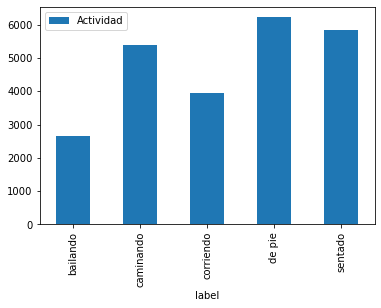

In [2]:
# leemos desde la hoja 2 la variable que contiene la actividad  
# y graficamos el número de registros por cada clase
y_ah = pd.read_excel('ActividadHumana.xlsx',sheet_name=1);
y_ah.groupby('label').count().plot(kind = 'bar');

#### NOTA 2: Una forma rápida de realizar una mirada de los datos es con la función scatter_matrix de pandas. 

tiempo de procesamiento 2.28 segundos


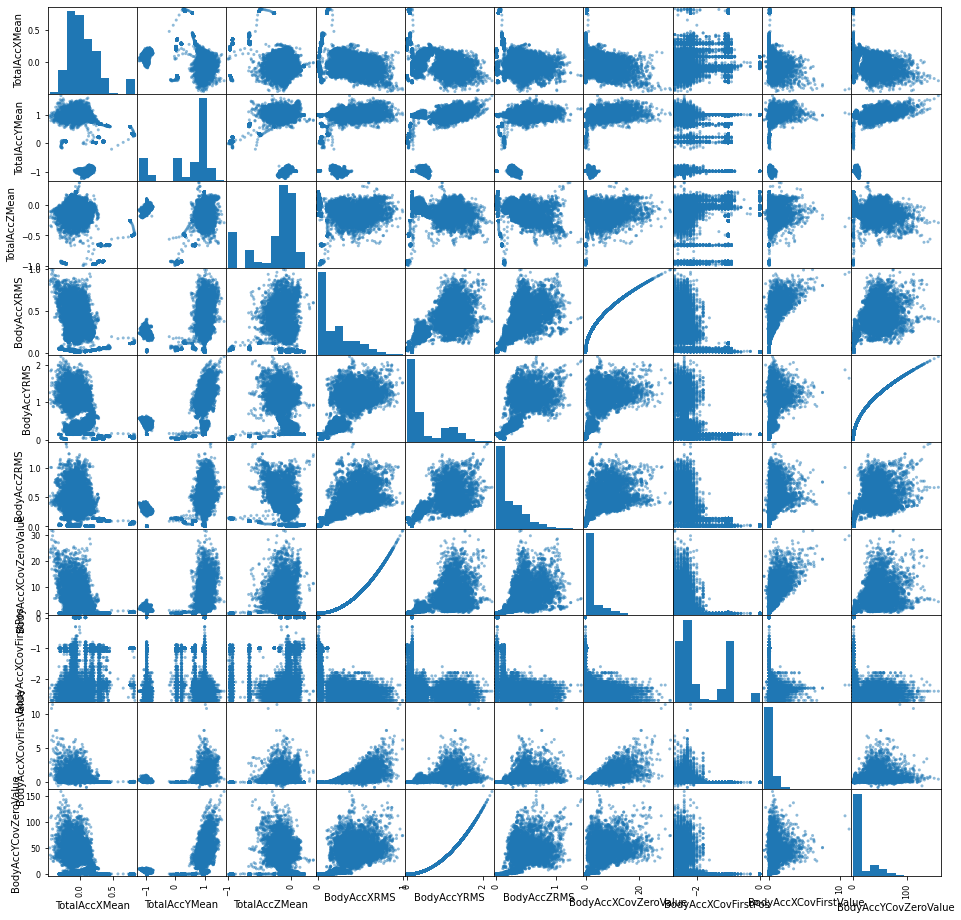

In [14]:
# Observe que el dataframe y_ah, tiene 2 columnas, solo se necesita una 
# Cuando un proceso toma su tiempo, podemos medirlo tomando el tiempo antes y después de ejecutado 

import time
t = time.time()

X = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)
#y = y.to_numpy()
#y = y.reshape(-1,1)
#y = np.ravel(y);

# Graficamos la matris de dispersión con 10 variables (si queremos revisar mejor, 
# es mejor menos variables para un gráfico más grande)
X = x_ah.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
y_name=y_ah.iloc[:,1]

scatter=pd.plotting.scatter_matrix(X, figsize=(16,16))
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

#### NOTA 3: Si tenemos datos con etiquetas conviene usar este dato para diferenciar cada clase.

tiempo de procesamiento 2.40 segundos


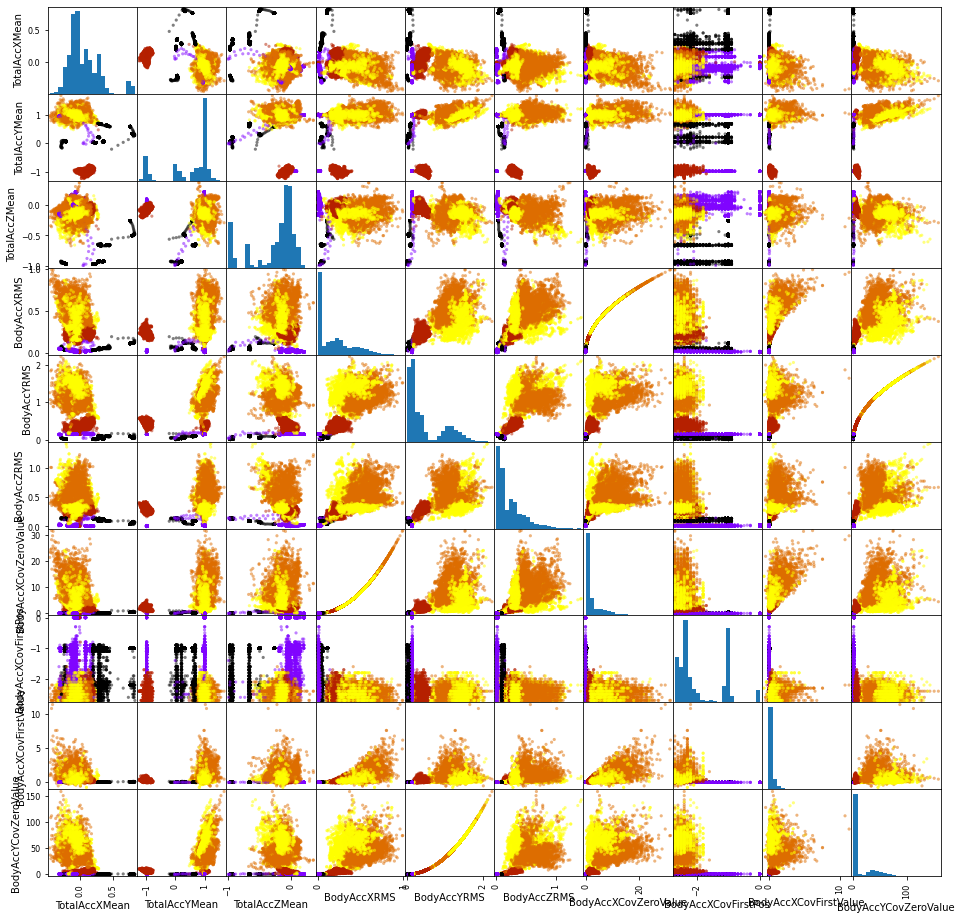

In [15]:
# Importamos la librería colormap (cm) para mejorar la visualización añadiendo colores:
# graficando una matriz de dispersión (plot matrix)

import time
t = time.time()

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':20}, figsize=(16,16), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)
# obser4ve que no contabiliza el tiempo de mostrarlo en pantalla

<h1>
<span style="color:BlueViolet" >CUESTIONARIO</span>
</h1>

<h3>
Pregunta 1: <span style="color:MidnightBlue">Complete los gráficos para el resto de variables. Por simplicidad tomemos arreglos de 10 variable</span>
</h3>

tiempo de procesamiento 7.16 segundos


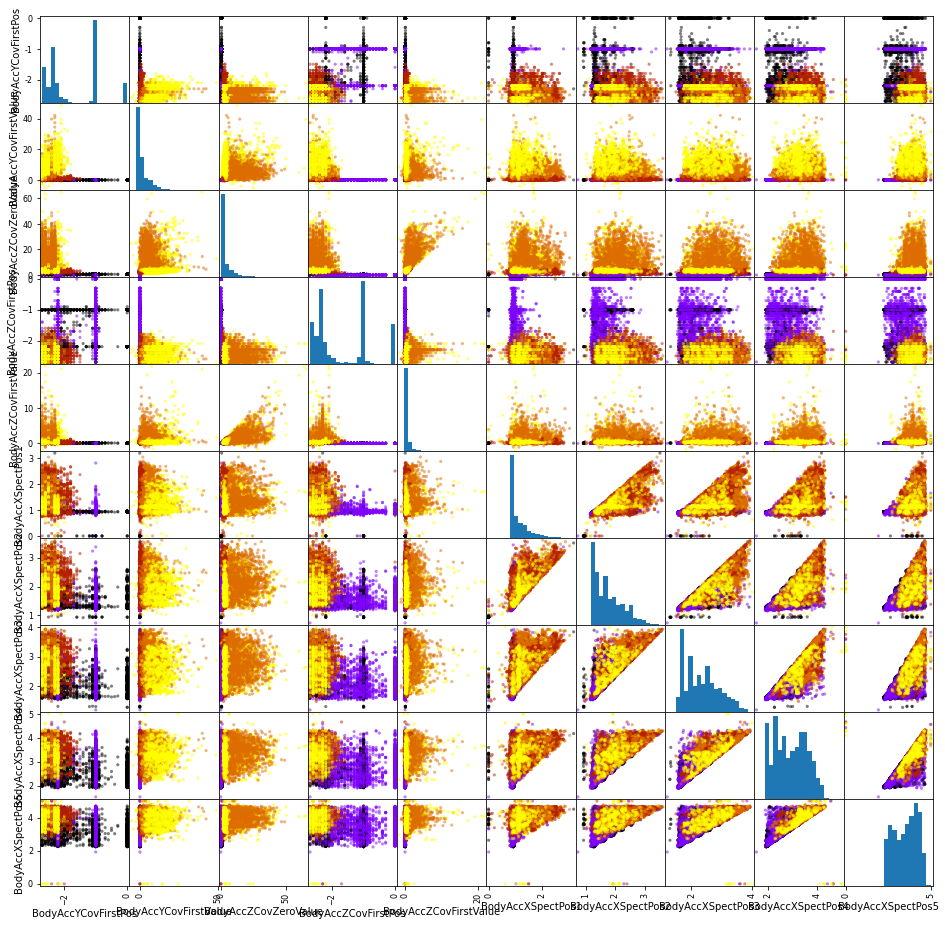

In [3]:
# Observe que el dataframe y_ah, tiene 2 columnas, solo se necesita una 
# Cuando un proceso toma su tiempo, podemos medirlo tomando el tiempo antes y después de ejecutado 

import time
t = time.time()

X2 = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)
#y = y.to_numpy()
#y = y.reshape(-1,1)
#y = np.ravel(y);

# Graficamos la matris de dispersión con 10 variables (si queremos revisar mejor, 
# es mejor menos variables para un gráfico más grande)
X2 = x_ah.iloc[:, [10,11,12,13,14,15,16,17,18,19]]
y_name=y_ah.iloc[:,1]

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X2, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':20}, figsize=(16,16), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

tiempo de procesamiento 7.93 segundos


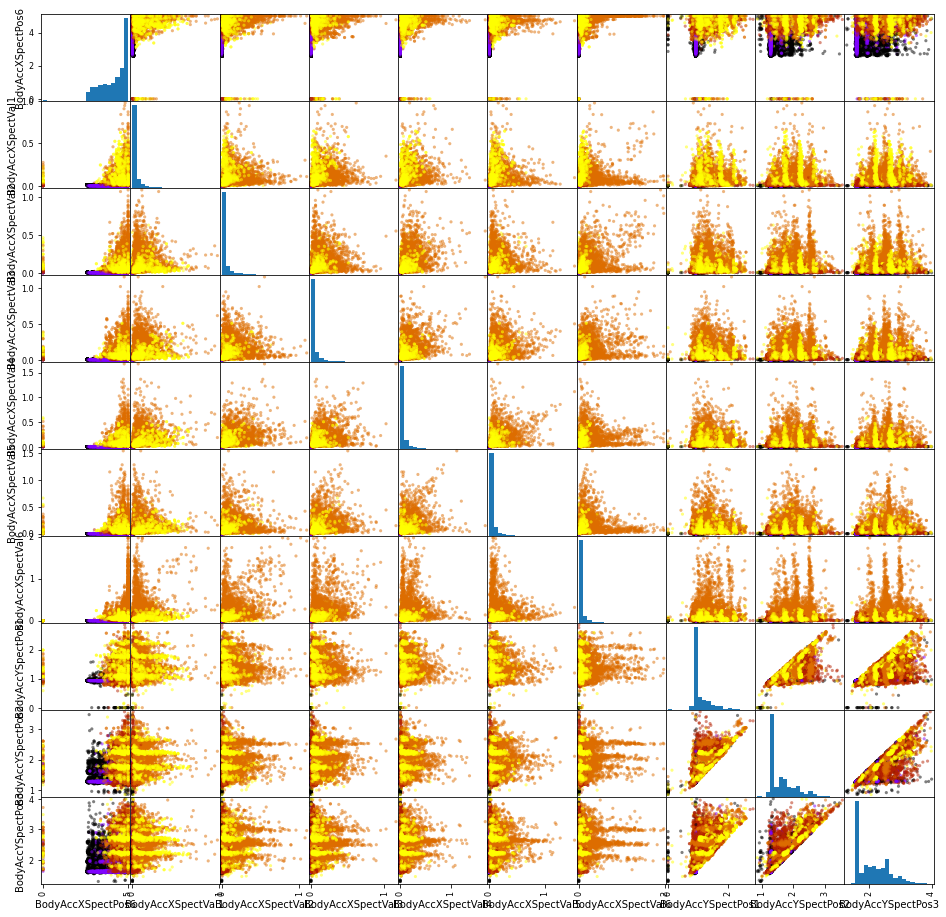

In [4]:
# Observe que el dataframe y_ah, tiene 2 columnas, solo se necesita una 
# Cuando un proceso toma su tiempo, podemos medirlo tomando el tiempo antes y después de ejecutado 

import time
t = time.time()

X3 = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)
#y = y.to_numpy()
#y = y.reshape(-1,1)
#y = np.ravel(y);

# Graficamos la matris de dispersión con 10 variables (si queremos revisar mejor, 
# es mejor menos variables para un gráfico más grande)
X3 = x_ah.iloc[:, [20,21,22,23,24,25,26,27,28,29]]
y_name=y_ah.iloc[:,1]

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X3, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':20}, figsize=(16,16), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

tiempo de procesamiento 7.82 segundos


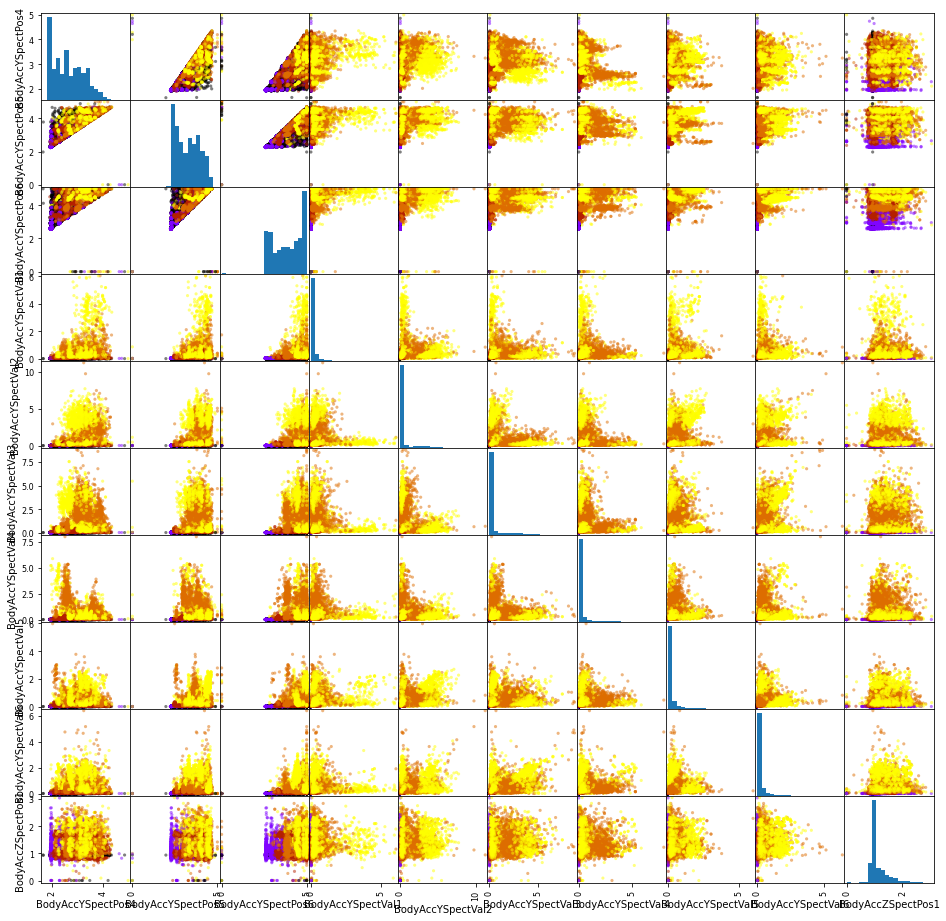

In [5]:
# Observe que el dataframe y_ah, tiene 2 columnas, solo se necesita una 
# Cuando un proceso toma su tiempo, podemos medirlo tomando el tiempo antes y después de ejecutado 

import time
t = time.time()

X4 = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)
#y = y.to_numpy()
#y = y.reshape(-1,1)
#y = np.ravel(y);

# Graficamos la matris de dispersión con 10 variables (si queremos revisar mejor, 
# es mejor menos variables para un gráfico más grande)
X4 = x_ah.iloc[:, [30,31,32,33,34,35,36,37,38,39]]
y_name=y_ah.iloc[:,1]

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X4, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':20}, figsize=(16,16), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

tiempo de procesamiento 7.64 segundos


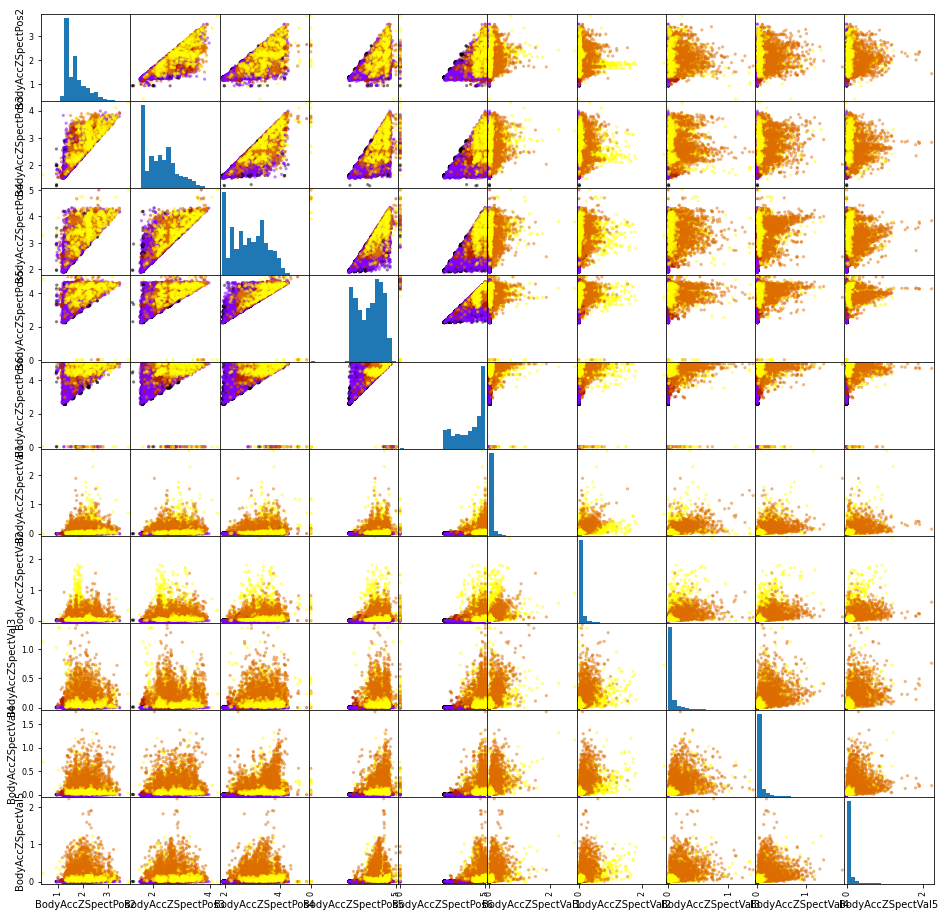

In [6]:
# Observe que el dataframe y_ah, tiene 2 columnas, solo se necesita una 
# Cuando un proceso toma su tiempo, podemos medirlo tomando el tiempo antes y después de ejecutado 

import time
t = time.time()

X5 = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)
#y = y.to_numpy()
#y = y.reshape(-1,1)
#y = np.ravel(y);

# Graficamos la matris de dispersión con 10 variables (si queremos revisar mejor, 
# es mejor menos variables para un gráfico más grande)
X5 = x_ah.iloc[:, [40,41,42,43,44,45,46,47,48,49]]
y_name=y_ah.iloc[:,1]

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X5, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':20}, figsize=(16,16), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

tiempo de procesamiento 7.11 segundos


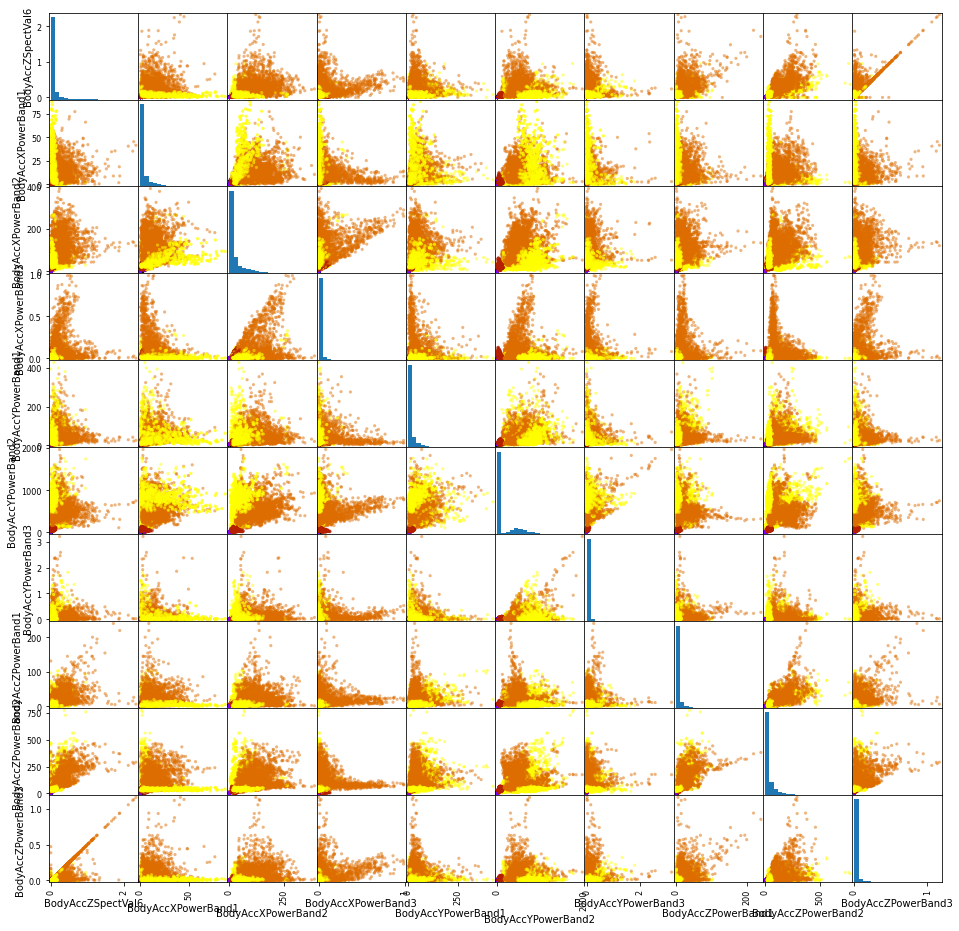

In [8]:
# Observe que el dataframe y_ah, tiene 2 columnas, solo se necesita una 
# Cuando un proceso toma su tiempo, podemos medirlo tomando el tiempo antes y después de ejecutado 

import time
t = time.time()

X6 = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)
#y = y.to_numpy()
#y = y.reshape(-1,1)
#y = np.ravel(y);

# Graficamos la matris de dispersión con 10 variables (si queremos revisar mejor, 
# es mejor menos variables para un gráfico más grande)
X6 = x_ah.iloc[:, [50,51,52,53,54,55,56,57,58,59]]
y_name=y_ah.iloc[:,1]

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X6, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':20}, figsize=(16,16), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

<h3>
Pregunta 2: <span style="color:MidnightBlue">Tome unas 4 variables que le parezcan interesentes y para cada una realice un histograma y un diagrama de caja. Cada variable en una sola ventana (2 gráficos) Observe aquellas que pueda distinguir el mayor número de clases con solo dos variables</span>
</h3>
<h3>
Pregunta 4: <span style="color:MidnightBlue">Si no lo hizo en la pregunta 2, realice los gráficos, diferenciando cada clase (con colores diferentes)</span>
</h3>

<h4>
<span style="color:MediumVioletRed">Nota: </span>Se ha realizado adecuadamente la pregunta 2, por tanto se cubre la pregunta 4. Debido a que se ha colocado diferentes colores a cada una de las clases para una mejor apreciación de las gráficas.
</h4>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
df = pd.read_excel('ActividadHumanas.xlsx',sheet_name=3);
df.head()

TotalAccXMean  TotalAccYMean  TotalAccZMean  BodyAccXRMS  BodyAccYRMS  \
0       0.764034       0.585142      -0.256940     0.109121     0.083456   
1       0.764064       0.585018      -0.256942     0.109209     0.083319   
2       0.764010       0.585013      -0.257079     0.108962     0.083465   
3       0.764093       0.584778      -0.257286     0.109039     0.083582   
4       0.764137       0.584614      -0.257317     0.109041     0.083301   

   BodyAccZRMS  BodyAccXCovZeroValue  BodyAccXCovFirstPos  \
0     0.036783              0.381036                 -1.0   
1     0.036554              0.381653                 -1.0   
2     0.036516              0.379924                 -1.0   
3     0.036911              0.380466                 -1.0   
4     0.036660              0.380481                 -1.0   

   BodyAccXCovFirstValue  BodyAccYCovZeroValue  ...  BodyAccXPowerBand2  \
0               0.067645              0.222877  ...            2.304699   
1               0.066487              0.222145  ...            2.310154   
2               0.066038              0.222926  ...            2.314777   
3               0.066519              0.223550  ...            2.303789   
4               0.066725              0.222048  ...            2.307175   

   BodyAccXPowerBand3  BodyAccYPowerBand1  BodyAccYPowerBand2  \
0            0.000411            1.497160            1.348245   
1            0.000459            1.485622            1.350188   
2            0.000418            1.499559            1.346296   
3            0.000408            1.497448            1.356222   
4            0.000464            1.493084            1.341705   

   BodyAccYPowerBand3  BodyAccZPowerBand1  BodyAccZPowerBand2  \
0            0.000273            0.291051            0.261600   
1            0.000243            0.284165            0.261658   
2            0.000268            0.287182            0.257530   
3            0.000264            0.291062            0.265375   
4            0.000243            0.287135            0.261906   

   BodyAccZPowerBand3  Actividad    label  
0            0.000049          1  sentado  
1            0.000052          1  sentado  
2            0.000045          1  sentado  
3            0.000052          1  sentado  
4            0.000048          1  sentado  

[5 rows x 62 columns]

<h3>
<span style="color:DarkSlateBlue">GRÁFICOS - HISTOGRAMA Y DIAGRAMA DE CAJA</span>
</h3>

<h3>
Variable Nro. 1: <span style="color:green">TotalAccYMean</span>
</h3>

Text(0.5, 1.0, 'Diagrama de Caja')

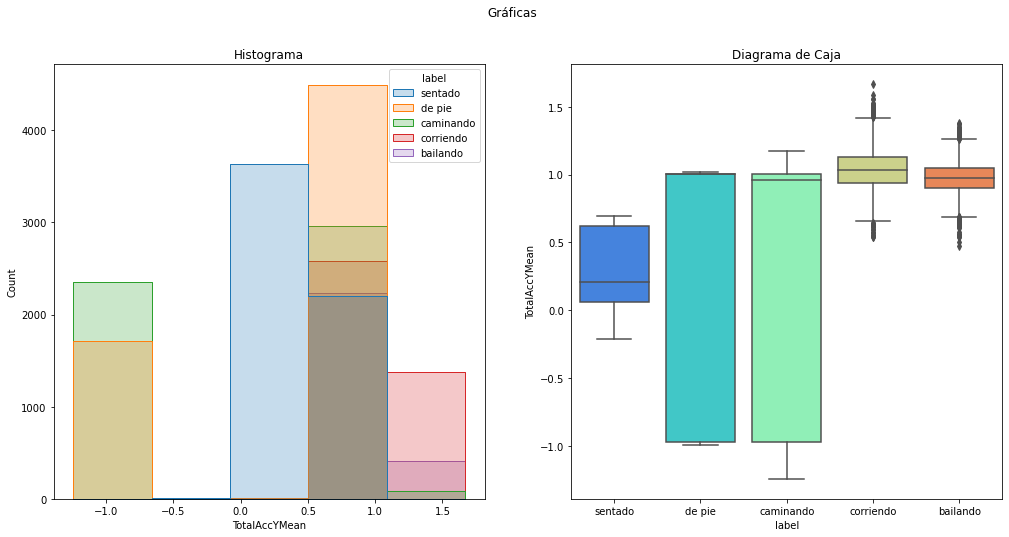

In [10]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2,figsize = (17, 8))
sns.histplot(data=df, x="TotalAccYMean", hue="label",bins=5,element="step", ax=axes[0])
sns.boxplot(x="label", y="TotalAccYMean", data=df,palette='rainbow', ax=axes[1])
f.suptitle('Gráficas')
axes[0].set_title('Histograma')
axes[1].set_title('Diagrama de Caja')

<h3>
Variable Nro. 2: <span style="color:green">BodyAccZRMS</span>
</h3>

Text(0.5, 1.0, 'Diagrama de Caja')

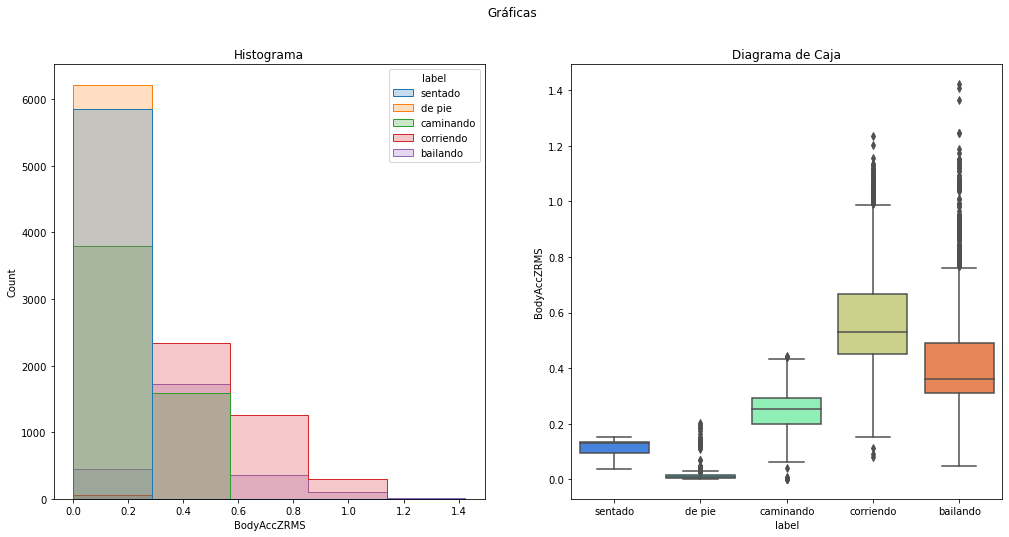

In [9]:
f, axes = plt.subplots(1, 2,figsize = (17, 8))
sns.histplot(data=df, x="BodyAccZRMS", hue="label",bins=5,element="step", ax=axes[0])
sns.boxplot(x="label", y="BodyAccZRMS", data=df,palette='rainbow', ax=axes[1])
f.suptitle('Gráficas')
axes[0].set_title('Histograma')
axes[1].set_title('Diagrama de Caja')

<h3>
Variable Nro. 3: <span style="color:green">BodyAccXSpectPos4</span>
</h3>

Text(0.5, 1.0, 'Diagrama de Caja')

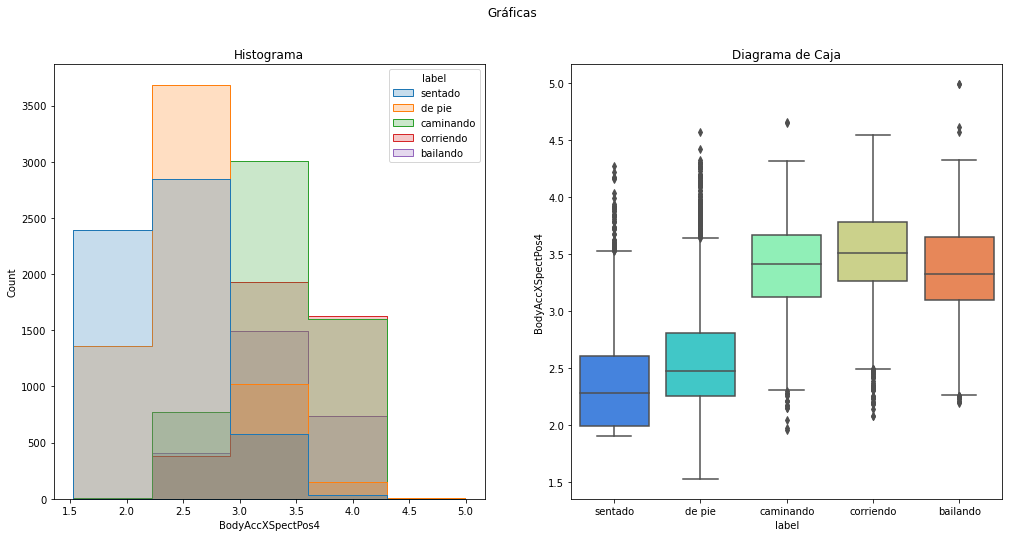

In [11]:
f, axes = plt.subplots(1, 2,figsize = (17, 8))
sns.histplot(data=df, x="BodyAccXSpectPos4", hue="label",bins=5,element="step", ax=axes[0])
sns.boxplot(x="label", y="BodyAccXSpectPos4", data=df,palette='rainbow', ax=axes[1])
f.suptitle('Gráficas')
axes[0].set_title('Histograma')
axes[1].set_title('Diagrama de Caja')

<h3>
Variable Nro. 4: <span style="color:green">BodyAccXSpectPos5</span>
</h3>

Text(0.5, 1.0, 'Diagrama de Caja')

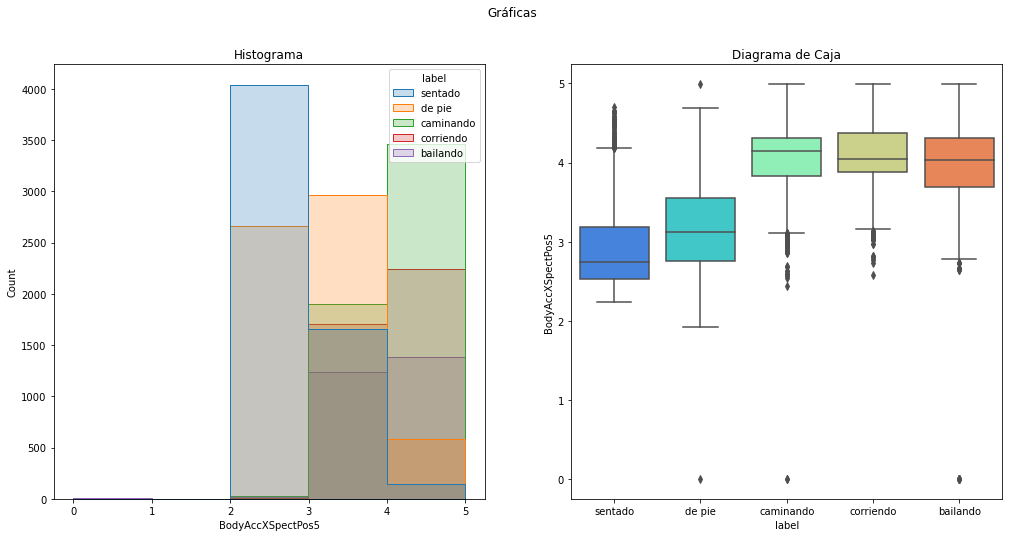

In [12]:
f, axes = plt.subplots(1, 2,figsize = (17, 8))
sns.histplot(data=df, x="BodyAccXSpectPos5", hue="label",bins=5,element="step", ax=axes[0])
sns.boxplot(x="label", y="BodyAccXSpectPos5", data=df,palette='rainbow', ax=axes[1])
f.suptitle('Gráficas')
axes[0].set_title('Histograma')
axes[1].set_title('Diagrama de Caja')

<h3>
Pregunta 3: <span style="color:MidnightBlue">Con las 4 variable realice el gráfico scatter matrix, con este y los anteriores, ¿qué conclusiones puede sacar?. Comente</span>
</h3>

<h3>
Gráfico Scatter Matrix: <span style="color:green">TotalAccYMean</span> <span style="color:Blue">BodyAccZRMS</span> <span style="color:OrangeRed">BodyAccXSpectPos4</span> <span style="color:MediumSlateBlue">BodyAccXSpectPos5 </span>
</h3>

tiempo de procesamiento 1.47 segundos


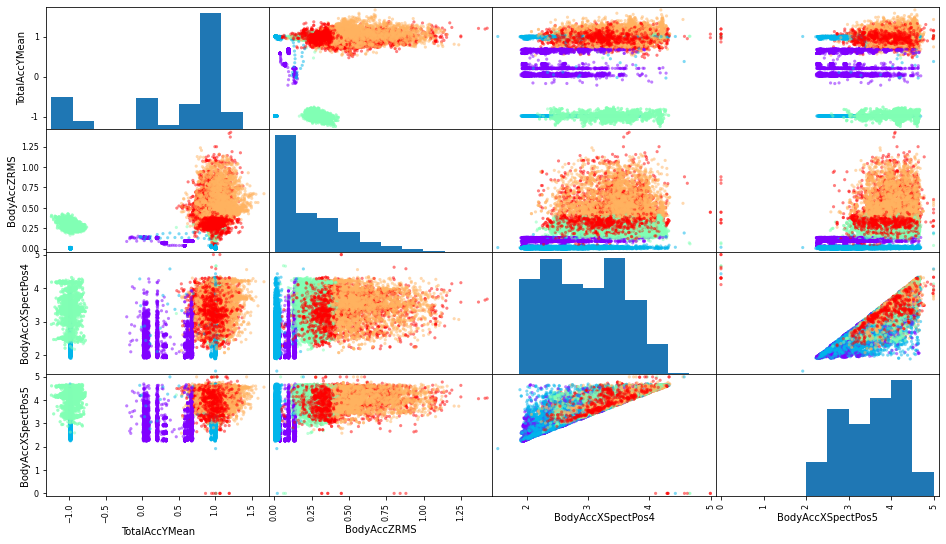

In [63]:
import time
t = time.time()
X7 = x_ah
y = y_ah.iloc[:,0];
y = y.to_frame().astype(float)


X7 = x_ah.iloc[:, [1,5,18,19]]
y_name=y_ah.iloc[:,1]

cmap = cm.get_cmap('rainbow')
scatter = pd.plotting.scatter_matrix(X7, c= y_ah.iloc[:,0], marker = '.', s=40, hist_kwds={'bins':10}, figsize=(16,9), cmap=cmap)
delta_t = time.time() - t
print('tiempo de procesamiento %4.2f segundos' %delta_t)

In [152]:
grouped = df.groupby(['label'])
res = grouped['BodyAccXSpectPos5'].count()
aux1 = res.to_frame(name = "count")
aux1 = pd.DataFrame(aux1, columns = ["count",'%']) 
aux1['%'] = (aux1['count'] / aux1['count'].sum()) * 100
aux1

count          %
label                      
bailando    2653  11.019730
caminando   5396  22.413292
corriendo   3956  16.431983
de pie      6220  25.835929
sentado     5850  24.299065

<h3>
<span style="color:blue">CONCLUSIONES</span>
</h3>

<li>De acuerdo al histograma realizado con los datos medidos por sensores de acelerómetro de teléfonos inteligentes para la variable TotalAccYMean, se concluye que la mayoría de las aceleraciones registradas para dicha variable pertenecen a la actividad humana "de pie" con un total de 6220 aceleraciones.</li>

<li>En base al diagrama de caja de la variable TotalAccYMean podemos afirmar que el valor de la mediana para la actividad humana con mayor aceleraciones registradas "de pie" es de 0.452545.</li>

<li>Posterior a comprender el diagrama de caja de la variable BodyAccZRMS se concluye que el dato (Xmin) con menor valor de aceleración registrado es de 0.000647 y pertenece a la clase "de pie".</li>

<li>Se concluye que un 25.83% de las acelariones registradas para la variable BodyAccZRMS equivalen a datos de la actividad humana "de pie".</li>

<li>Una vez analizadas las gráficas de las cuatro variables propuestas se concluye que el menor número de aceleraciones registradas para cada variable por clase es de la actividad humana "corriendo", debido a que ésta posee un total de 3956 registros, lo que representa un 16.43%.</li>